# 캐글 타이타닉 생존자 예측
https://www.kaggle.com/competitions/titanic/overview

## 캐글 진행 단계
1. 문제 정의
2. 학습, 테스트 데이터 획득
3. 데이터 전처리
4. 데이터 분석
5. 문제 모델링, 문제 예측 및 해결
6. 시각화 및 문제 해결 단계외 최종 해결책을 제시
7. 결과제출

### 대회 목적
승객 정보를 보고 생사에 영향을 주는 속성이 무엇이며, 어떤 경향을 보이는지 파악한 후 생사 여부를 알 수 없는 승객이 과연 생존했는지 사망했는지를 예측

필요한 라이브러리 선언

In [1]:
import pandas as pd
import numpy as np

### 학습, 테스트 데이터 획득

데이터 처리가 쉬운 pandas 패키지를 사용

In [2]:
#판다스에서 가져온 데이터 = 데이터프레임:행과 열 있는 테이블 형식
train_df=pd.read_csv("C:/kaggle/titanic/data/train.csv")
test_df=pd.read_csv("C:/kaggle/titanic/data/test.csv")
submission=pd.read_csv("C:/kaggle/titanic/data/gender_submission.csv")

In [3]:
#데이터 잘 불렀는지 확인
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### 랜덤시드 설정

In [8]:
import random
np.random.seed(1234)
random.seed(1234)

### 데이터 개요 파악
#### 데이터 행과 열 확인하기

In [9]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


#### 데이터 내용 미리보기

In [10]:
#표시할 수 있는 행과 열 정해져있음
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
#자유롭게 행과 열 표시
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)

#### 데이터 피처 확인

In [24]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


어떤 특성이 survived와 연관이 있을지 생각해보기

#### 데이터 속성 확인

In [22]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

질적 변수: 분류를 위한 수치, 수차 사이의 간격에 큰 의미가 없는 경우 ex) Pclass
 - 명목 척도: 단지 분류를 위한 것 ex) 방 번호, 티켓 번호 
 - 순서 척도: 질적 변수중 순서에 의미가 있는 것 ex) Pclass
 
양적 변수: 간격에 의미가 있는 수치 ex) age, fare
 - 간격 척도: 같은 간격의 눈금으로 측정 하는 것
 - 비례 척도:  간격 척도의 조건을 만족시키는것 중 원점이 있어서 데이터 비율에 의미를 갖는 것 ex) fare : 3달러 티켓 1달러 티켓보다 3배 비싸다

#### 데이터의 통계량 확인하기

In [25]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 카테고리 변수 확인하기

In [27]:
#특정 열 데이터 확인
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
#Embarked의 카테고리 별로 개수 파악
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
#방 번호
train_df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

#### 결측치 확인

In [32]:
#행과 열별로 결측치 존재 여부 파악
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
#각 변수별 결측치
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

age 및 cabin의 속성에 결측치 많음을 확인

### 데이터 시각화

#### 시각화용 라이브러리 설치

In [37]:
#주피터 노트북 안에서 그래프 표시
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#### 표시 스타일 지정

In [39]:
#다양한 스타이 있음, 여기서는 대중적 ggplot 사용
plt.style.use('ggplot')

#### 데이터 프레임에서 임의의 열 추출하기
survived의 값별로 각 값에 차이가 있는지 확인하기 위해 Embarked,Survived,PassengerId 추출

In [41]:
train_df[['Embarked','Survived','PassengerId']]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


#### 시각화하고 싶은 데이터에서 결측치 제외

In [42]:
train_df[['Embarked','Survived','PassengerId']].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


#### Embarked와 Survived로만 집계
groupby안에 작성한 후 count로 실행

In [43]:
train_df[['Embarked','Survived','PassengerId']].dropna().groupby(['Embarked','Survived']).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

#### 데이터를 수평으로 변환
데이터프레임을 시각화하기 쉽게 바꾸기

In [50]:
#unstack으로 수직 -> 수평 변환
embarked_df=train_df[['Embarked','Survived','PassengerId']].dropna().groupby(['Embarked','Survived']).count().unstack()

embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

#### 누적 막대 그래프로 시각화

<AxesSubplot:xlabel='Embarked'>

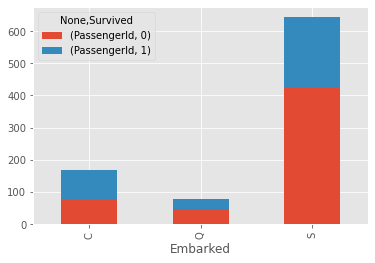

In [51]:
embarked_df.plot.bar(stacked=True)

c에서 절반 정도 사망, q,s에서는 절반 이상 사망<br>
=>승선항구에 따라 승객 유형이나 상태에 차이가 있을수도 있다

In [53]:
#0번째 열(사망 수)을 0번째 열과 1번째 열(생존 수)의 합으로 나누기
embarked_df['survived_rate']=embarked_df.iloc[:,0]/(embarked_df.iloc[:,0]+embarked_df.iloc[:,1])
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

#### 성별과 티켓 등급 시각화

<AxesSubplot:xlabel='Sex'>

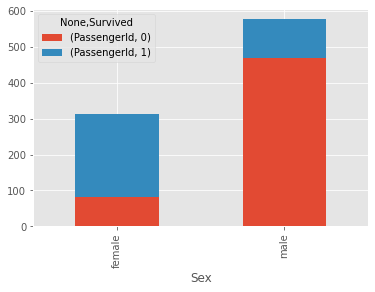

In [54]:
sex_df=train_df[['Sex','Survived','PassengerId']].dropna().groupby(['Sex','Survived']).count().unstack()

sex_df.plot.bar(stacked=True)

<AxesSubplot:xlabel='Pclass'>

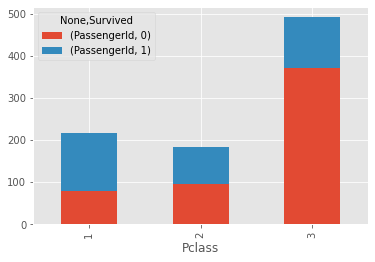

In [55]:
ticket_df=train_df[['Pclass','Survived','PassengerId']].dropna().groupby(['Pclass','Survived']).count().unstack()

ticket_df.plot.bar(stacked=True)

여성> 남성, 티켓 등급이 높을수록 생존율 높다

#### 연령별 생존율을 히스토그램으로 시각화
연령은 연속 값이므로 히스트로그램으로 확인<br>
plt.hist() // 히스트로그램 그리기<br>
histtype='barstacked' // 여러 히스토그램 동시에 보이기<br>
bins=8 // 히스트로그램 빈 개수<br>
label // 라벨 지정<br>
plt.legend() // 라벨 표시<br>

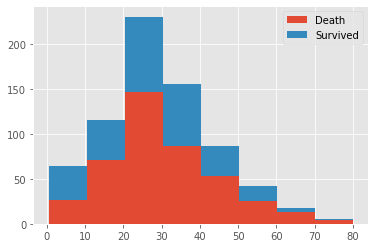

In [58]:
plt.hist(x=[train_df.Age[train_df.Survived==0], train_df.Age[train_df.Survived==1]],bins=8,histtype='barstacked',label=['Death','Survived'])
plt.legend()

#### 10세 이하가 다른 연령에 비해 생존율 높다

#### 카테고리 변수를 더미 변수화하기
문자열 변수 분석이나 머신 러닝에서 사용 불가능<br>
수치 데이터가 아니라면 수치로 변환<br>
원-핫 인코딩: 어떤 카테고리에 대하여 1,0으로 표현<br>
=>더미 변수화 한다

In [64]:
#drop_first=True 하면 중복 열 제외
train_df_corr=pd.get_dummies(train_df,columns=['Sex'],drop_first=True)
train_df_corr=pd.get_dummies(train_df_corr,columns=['Embarked'])

train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1


#### 상관 행렬 작성
-1~1의 수치로 확인

In [66]:
train_corr=train_df_corr.corr()

train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


#### 히트맵으로 시각화
annot // 상관 계수가 각 칸에 숫자로 나타남

<AxesSubplot:>

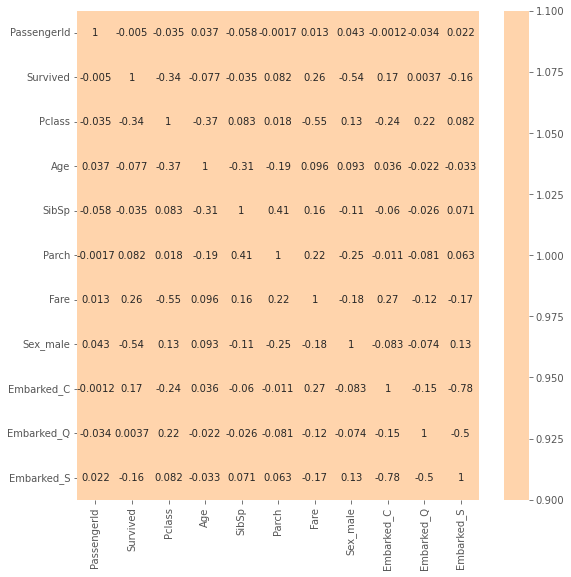

In [68]:
plt.figure(figsize=(9,9))
sns.heatmap(train_corr,vmax=1,vmin=1,center=0,annot=True)